In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, roc_curve, auc

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
#from mlxtend.classifier import StackingCVClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMModel

In [18]:
df = pd.read_csv('optimum.inde.csv')

In [73]:
df

,mol,PEOE_VSA+2,PEOE_VSA_POS,PEOE_VSA+0,PEOE_VSA-0,SlogP_VSA3,SMR_VSA6,vsa_hyd,PEOE_VSA_NEG,Weight,PEOE_VSA_HYD,Q_VSA_HYD,Q_VSA_POS,vdw_area,Label
0,Clc1c(-c2c(C)ccc3n[nH]cc23)cc2N(c3c(C(C)C)cccc...,119.387640,389.01550,203.301900,54.051102,73.758316,86.174973,431.06790,135.29155,567.09302,466.78311,524.30707,524.30707,524.30707,1
1,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)nccc3C)C(=O...,96.267998,431.28537,228.293260,2.208540,55.318733,67.735397,422.21329,101.44762,577.06000,451.93527,532.73297,532.73297,532.73297,1
2,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,96.267998,458.28442,244.101760,0.000000,55.318733,67.735397,422.21329,104.92165,606.10199,476.72580,563.20605,563.20605,563.20605,1
3,Clc1c(-c2c(F)cccc2O)nc2N(c3c(CC)cccc3C)C(=O)N=...,96.267998,372.66934,196.676270,51.842564,55.318733,67.735397,413.23126,145.39906,562.04498,442.95325,518.06836,518.06836,518.06836,1
4,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,96.267998,458.28442,244.101760,0.000000,55.318733,67.735397,422.21329,104.92165,606.10199,476.72580,563.20605,563.20605,563.20605,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Clc1cc(CN2CCN(CC(=O)Nc3cc4c(-n5c(-c6cc(Cl)ccc6...,11.190562,271.61749,152.325930,98.902718,92.197891,97.456673,415.53558,239.63213,547.48999,484.59625,511.24960,511.24960,511.24960,0
393,Clc1c(C(F)(F)F)cc(NC(=O)c2cc(Nc3ncnc4c3nc(N3CC...,64.178246,248.45192,80.380768,90.932053,36.879158,42.137939,334.19284,216.97446,545.92798,379.27011,465.42636,465.42636,465.42636,0
394,FC(F)(F)c1c(CN2CCN(CC)CC2)ccc(NC(=O)c2cc(C#Cc3...,17.890114,284.97897,170.601120,125.695000,126.259040,132.314210,464.31961,252.12817,545.60901,495.72574,537.10718,537.10718,537.10718,0
395,FC(F)(F)c1c(N2C(=O)C3(CC2)CCN(CC2CCOCC2)CC3)cc...,0.000000,309.97809,249.217250,164.699870,170.929570,176.188350,465.50208,216.49646,548.69397,488.40881,526.47455,526.47455,526.47455,0


In [74]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [75]:
df.dropna()

,mol,PEOE_VSA+2,PEOE_VSA_POS,PEOE_VSA+0,PEOE_VSA-0,SlogP_VSA3,SMR_VSA6,vsa_hyd,PEOE_VSA_NEG,Weight,PEOE_VSA_HYD,Q_VSA_HYD,Q_VSA_POS,vdw_area,Label
0,Clc1c(-c2c(C)ccc3n[nH]cc23)cc2N(c3c(C(C)C)cccc...,119.387640,389.01550,203.301900,54.051102,73.758316,86.174973,431.06790,135.29155,567.09302,466.78311,524.30707,524.30707,524.30707,1
1,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)nccc3C)C(=O...,96.267998,431.28537,228.293260,2.208540,55.318733,67.735397,422.21329,101.44762,577.06000,451.93527,532.73297,532.73297,532.73297,1
2,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,96.267998,458.28442,244.101760,0.000000,55.318733,67.735397,422.21329,104.92165,606.10199,476.72580,563.20605,563.20605,563.20605,1
3,Clc1c(-c2c(F)cccc2O)nc2N(c3c(CC)cccc3C)C(=O)N=...,96.267998,372.66934,196.676270,51.842564,55.318733,67.735397,413.23126,145.39906,562.04498,442.95325,518.06836,518.06836,518.06836,1
4,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,96.267998,458.28442,244.101760,0.000000,55.318733,67.735397,422.21329,104.92165,606.10199,476.72580,563.20605,563.20605,563.20605,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Clc1cc(CN2CCN(CC(=O)Nc3cc4c(-n5c(-c6cc(Cl)ccc6...,11.190562,271.61749,152.325930,98.902718,92.197891,97.456673,415.53558,239.63213,547.48999,484.59625,511.24960,511.24960,511.24960,0
393,Clc1c(C(F)(F)F)cc(NC(=O)c2cc(Nc3ncnc4c3nc(N3CC...,64.178246,248.45192,80.380768,90.932053,36.879158,42.137939,334.19284,216.97446,545.92798,379.27011,465.42636,465.42636,465.42636,0
394,FC(F)(F)c1c(CN2CCN(CC)CC2)ccc(NC(=O)c2cc(C#Cc3...,17.890114,284.97897,170.601120,125.695000,126.259040,132.314210,464.31961,252.12817,545.60901,495.72574,537.10718,537.10718,537.10718,0
395,FC(F)(F)c1c(N2C(=O)C3(CC2)CCN(CC2CCOCC2)CC3)cc...,0.000000,309.97809,249.217250,164.699870,170.929570,176.188350,465.50208,216.49646,548.69397,488.40881,526.47455,526.47455,526.47455,0


In [22]:
df

,mol,PEOE_VSA+2,PEOE_VSA_POS,PEOE_VSA+0,PEOE_VSA-0,SlogP_VSA3,SMR_VSA6,vsa_hyd,PEOE_VSA_NEG,Weight,PEOE_VSA_HYD,Q_VSA_HYD,Q_VSA_POS,vdw_area,Label
0,Clc1c(-c2c(C)ccc3n[nH]cc23)cc2N(c3c(C(C)C)cccc...,119.387640,389.01550,203.301900,54.051102,73.758316,86.174973,431.06790,135.29155,567.09302,466.78311,524.30707,524.30707,524.30707,1
1,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)nccc3C)C(=O...,96.267998,431.28537,228.293260,2.208540,55.318733,67.735397,422.21329,101.44762,577.06000,451.93527,532.73297,532.73297,532.73297,1
2,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,96.267998,458.28442,244.101760,0.000000,55.318733,67.735397,422.21329,104.92165,606.10199,476.72580,563.20605,563.20605,563.20605,1
3,Clc1c(-c2c(F)cccc2O)nc2N(c3c(CC)cccc3C)C(=O)N=...,96.267998,372.66934,196.676270,51.842564,55.318733,67.735397,413.23126,145.39906,562.04498,442.95325,518.06836,518.06836,518.06836,1
4,Clc1c(-c2c(F)cccc2O)nc2N(c3c(C(C)C)ncnc3C(C)C)...,96.267998,458.28442,244.101760,0.000000,55.318733,67.735397,422.21329,104.92165,606.10199,476.72580,563.20605,563.20605,563.20605,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Clc1cc(CN2CCN(CC(=O)Nc3cc4c(-n5c(-c6cc(Cl)ccc6...,11.190562,271.61749,152.325930,98.902718,92.197891,97.456673,415.53558,239.63213,547.48999,484.59625,511.24960,511.24960,511.24960,0
393,Clc1c(C(F)(F)F)cc(NC(=O)c2cc(Nc3ncnc4c3nc(N3CC...,64.178246,248.45192,80.380768,90.932053,36.879158,42.137939,334.19284,216.97446,545.92798,379.27011,465.42636,465.42636,465.42636,0
394,FC(F)(F)c1c(CN2CCN(CC)CC2)ccc(NC(=O)c2cc(C#Cc3...,17.890114,284.97897,170.601120,125.695000,126.259040,132.314210,464.31961,252.12817,545.60901,495.72574,537.10718,537.10718,537.10718,0
395,FC(F)(F)c1c(N2C(=O)C3(CC2)CCN(CC2CCOCC2)CC3)cc...,0.000000,309.97809,249.217250,164.699870,170.929570,176.188350,465.50208,216.49646,548.69397,488.40881,526.47455,526.47455,526.47455,0


In [76]:
X = df.iloc[ : , 1 : 13]
y = df.iloc[:, -1:]

In [77]:
non_negative =X[X>=0]

In [78]:
ddd = non_negative.fillna(value = 0)

In [79]:
    norma =  preprocessing.normalize(ddd)
norma

array([[0.09696044, 0.31593817, 0.16511124, ..., 0.37909698, 0.42581495,
        0.42581495],
       [0.07736291, 0.34658966, 0.18346109, ..., 0.36318434, 0.42811501,
        0.42811501],
       [0.07372956, 0.35099006, 0.18695223, ..., 0.36511392, 0.43134726,
        0.43134726],
       ...,
       [0.01432609, 0.22820615, 0.13661438, ..., 0.39696845, 0.43010598,
        0.43010598],
       [0.        , 0.24482191, 0.19683276, ..., 0.38574719, 0.41581167,
        0.41581167],
       [0.01522755, 0.19902371, 0.11444029, ..., 0.4011195 , 0.42762798,
        0.42762798]])

In [80]:
from sklearn.model_selection import train_test_split
wq=X_train, X_test, y_train, y_test = train_test_split(norma, y, test_size= 0.3 )
print(f" the shape of training set: {X_train.shape}")
print(f" the shape of testing set: {X_test.shape}")

 the shape of training set: (277, 12)
 the shape of testing set: (120, 12)


# MODELS

# SVM

In [81]:
param_grid = { 'C': [0.1 , 1 ,10 ,100, 1000],
             'gamma': [1 , 0.1 , 0.001 , 0.0001]}

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
grid = GridSearchCV(SVC() , param_grid, verbose = 2)

In [84]:
grid.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=2)

In [85]:
grid.best_params_

{'C': 1000, 'gamma': 0.1}

In [86]:
grid.best_score_

0.9277922077922078

In [87]:
grid_pred = grid.predict(X_train)

In [88]:
aa = pd.DataFrame(grid_pred)

In [89]:
aa.value_counts()

0    211
1     66
dtype: int64

In [90]:
print("The AUC of KNN after selection: {}".format(grid.score(X_train, y_train)))

The AUC of KNN after selection: 0.927797833935018


# KNN 

In [92]:
knn = KNeighborsClassifier(n_neighbors=11)

In [93]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=11)

In [94]:
knn_pred = knn.predict(X_train)

In [95]:
aa = pd.DataFrame(knn_pred)

In [96]:
aa.value_counts()

0    192
1     85
dtype: int64

In [97]:
#knn_pred.reshape(116 , 1)

In [98]:
y_train.shape

(277, 1)

In [99]:
acc = accuracy_score(y_train , knn_pred)
print('Accuracy=' , acc)

Accuracy= 0.9169675090252708


In [100]:
aa.value_counts()

0    192
1     85
dtype: int64

# RESULTS

# KNN scores

In [101]:


acc = accuracy_score(y_train , knn_pred)
print('Accuracy=' , acc)

f1 = f1_score(y_train , knn_pred)
print('f1_score = ' , f1)


precision = precision_score(y_train , knn_pred)
print('precision =' ,  precision)

roc = roc_auc_score( y_train , knn_pred)
print('roc_auc score=', roc)




cm=confusion_matrix(y_train,knn_pred)
print("Confusion Matrix:\n",cm,"\n")


TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity

sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity

spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
import math
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy= 0.9169675090252708
f1_score =  0.8456375838926175
precision = 0.7411764705882353
roc_auc score= 0.940544307511737
Confusion Matrix:
 [[191  22]
 [  1  63]] 

Sensitivity= 0.984375 

Specificity= 0.8967136150234741 

MCC = 0.8052658857516117


# SVM SCORES

In [102]:
acc = accuracy_score(y_train , grid_pred)
print('Accuracy=' , acc)

f1 = f1_score(y_train , grid_pred)
print('f1_score = ' , f1)


precision = precision_score(y_train , grid_pred)
print('precision =' ,  precision)

roc = roc_auc_score( y_train , grid_pred)
print('roc_auc score=', roc)

print('classification report \n',classification_report(y_train , grid_pred))


cm=confusion_matrix(y_train,grid_pred)
print("Confusion Matrix:\n",cm,"\n")

cm


TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity

sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity

spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy= 0.927797833935018
f1_score =  0.8461538461538461
precision = 0.8333333333333334
roc_auc score= 0.9038659037558686
classification report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       213
           1       0.83      0.86      0.85        64

    accuracy                           0.93       277
   macro avg       0.90      0.90      0.90       277
weighted avg       0.93      0.93      0.93       277

Confusion Matrix:
 [[202  11]
 [  9  55]] 

Sensitivity= 0.859375 

Specificity= 0.9483568075117371 

MCC = 0.7991600741446182


# Random Forest

In [103]:
param_grid = {'n_estimators': [5, 10, 15, 20, 25,30,40,50]}
gr_raw_RF = GridSearchCV(RandomForestClassifier(random_state=1994), param_grid, cv=5, scoring='roc_auc')
gr_raw_RF.fit(X_train , y_train)
print("The AUC of RF after selection: {}".format(gr_raw_RF.score(X_train, y_train)))

The AUC of RF after selection: 0.9999633215962441


In [104]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=11)
kf=KFold(n_splits=10,shuffle=True,random_state=5)

#Accuracy
acc =cross_val_score(rf,X, y,cv=kf,scoring="accuracy")
print("Accuracy =",acc.mean(),"\n")

#F1-Score
f1 =cross_val_score(rf,X, y,cv=kf,scoring="f1")
print("F1 Score=",f1.mean(),"\n")

#precision
precision =cross_val_score(rf,X, y,cv=kf,scoring="precision")
print("Precision=",precision.mean(),"\n")

#Recall
recall =cross_val_score(rf,X, y,cv=kf,scoring="recall")
print("Recall =",recall.mean(),"\n")

#auc
auc =cross_val_score(rf,X, y,cv=kf,scoring="roc_auc")
print("Auc =",auc.mean(),"\n")

y_pred=cross_val_predict(rf,X,y,cv=kf)

#Confusion Matrix
cm=confusion_matrix(y,y_pred)
print("Confusion Matrix:\n",cm,"\n")

#confusion metrics measures
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
import math
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy = 0.9747435897435898 

F1 Score= 0.9500392544920745 

Precision= 0.975 

Recall = 0.9725146198830409 

Auc = 0.995462126418196 

Confusion Matrix:
 [[293   5]
 [  7  92]] 

Sensitivity= 0.9292929292929293 

Specificity= 0.9832214765100671 

MCC = 0.9187957215614008


In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
GNB =  GaussianNB()

In [107]:
GNB.fit(X=X_train, y=y_train)

GaussianNB()

In [108]:
predicted = GNB.predict(X=X_test)

In [109]:
expected = y_test

In [110]:
predicted[:20]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [111]:
expected[:20]

,Label
198,0
108,0
364,0
70,1
323,0
88,1
91,1
25,1
35,1
260,0


In [112]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [113]:
wrong

[(0, 'Label')]

In [114]:
print(f'{GNB.score(X_test, y_test):.2%}')

90.83%


In [115]:
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn

In [116]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

kf=KFold(n_splits=10,shuffle=True,random_state=5)

#Accuracy
acc =cross_val_score(nb,X, y,cv=kf,scoring="accuracy")
print("Accuracy =",acc.mean(),"\n")

#F1-Score
f1 =cross_val_score(nb,X, y,cv=kf,scoring="f1")
print("F1 Score=",f1.mean(),"\n")

#precision
precision =cross_val_score(nb,X, y,cv=kf,scoring="precision")
print("Precision=",precision.mean(),"\n")

#Recall
recall =cross_val_score(nb,X, y,cv=kf,scoring="recall")
print("Recall =",recall.mean(),"\n")

#auc
auc =cross_val_score(nb,X, y,cv=kf,scoring="roc_auc")
print("Auc =",auc.mean(),"\n")

y_pred=cross_val_predict(nb,X,y,cv=kf)

#Confusion Matrix
cm=confusion_matrix(y,y_pred)
print("Confusion Matrix:\n",cm,"\n")

#confusion metrics measures
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
import math
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy = 0.9446794871794871 

F1 Score= 0.8921449462728235 

Precision= 0.8162087912087912 

Recall = 1.0 

Auc = 0.9945762814738147 

Confusion Matrix:
 [[276  22]
 [  0  99]] 

Sensitivity= 1.0 

Specificity= 0.9261744966442953 

MCC = 0.8705051025801399


In [117]:
Rf_pred = gr_raw_RF.predict(X_train)

# GaussianNB

In [118]:
GNB =  GaussianNB()

In [119]:
GNB.fit(X_train,y_train)
print("The AUC of GNB after selection: {}".format(GNB.score(X_train, y_train)))

The AUC of GNB after selection: 0.8989169675090253


In [120]:
GNB_pred = GNB.predict(X_train)

In [124]:
acc = accuracy_score(y_train , GNB_pred)
print('Accuracy=' , acc)

f1 = f1_score(y_train , GNB_pred)
print('f1_score = ' , f1)


precision = precision_score(y_train , GNB_pred)
print('precision =' ,  precision)

roc = roc_auc_score( y_train , GNB_pred)
print('roc_auc score=', roc)

print('classification report \n',classification_report(y_train , GNB_pred))


cm=confusion_matrix(y_train,GNB_pred)
print("Confusion Matrix:\n",cm,"\n")

cm


TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

#Sensitivity

sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity

spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")
import math
#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

Accuracy= 0.8989169675090253
f1_score =  0.8157894736842106
precision = 0.7045454545454546
roc_auc score= 0.9233421361502347
classification report 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       213
           1       0.70      0.97      0.82        64

    accuracy                           0.90       277
   macro avg       0.85      0.92      0.87       277
weighted avg       0.92      0.90      0.90       277

Confusion Matrix:
 [[187  26]
 [  2  62]] 

Sensitivity= 0.96875 

Specificity= 0.8779342723004695 

MCC = 0.7665297995220512


In [122]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, knn_pred)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_train, grid_pred)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_train, Rf_pred)
false_positive_rate4, true_positive_rate4, threshold = roc_curve(y_train, GNB_pred)

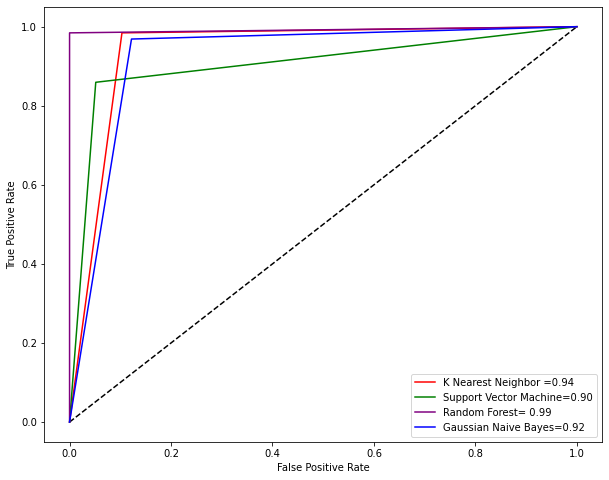

In [123]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], 'k--')
plt.plot(false_positive_rate1, true_positive_rate1, label= "K Nearest Neighbor =0.94" , color = 'red' , linewidth = 1.5 )
plt.plot(false_positive_rate2, true_positive_rate2, label= "Support Vector Machine=0.90", color = 'green', linewidth = 1.5 ) 
plt.plot(false_positive_rate3, true_positive_rate3, label= "Random Forest= 0.99", color = 'purple', linewidth =  1.5 ) 
plt.plot(false_positive_rate4, true_positive_rate4, label= "Gaussian Naive Bayes=0.92", color = 'blue', linewidth =   1.5 ) 

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('ROC.jpg',dpi=600)
plt.show()


In [56]:
df['Data sets'] = 'test set (N = 209)'
df.loc[y_train.index, 'Data sets'] = 'training set (N = 910)'
plt.figure(figsize=(10,8))
sns.scatterplot(df.Weight, df.h_logP, hue=df['Data sets']  ,s = 60,  linewidth = 0.65  , edgecolor = 'black' )
plt.savefig('figure 1A.jpg',dpi=600)

AttributeError: 'DataFrame' object has no attribute 'h_logP'

<Figure size 720x576 with 0 Axes>